In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [10]:

file_name = "/Users/aashvibudia/Documents/weatherAUS.csv"
df = pd.read_csv(file_name)

print("Dataset loaded successfully!")
df.head(5)


Dataset loaded successfully!


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [11]:
df_cleaned = df.select_dtypes(include=[np.number]).dropna()


scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_cleaned)
df_normalized = pd.DataFrame(df_normalized, columns=df_cleaned.columns)

print("\nCleaned and normalized dataset (using all numerical features):")
df_normalized.head(5)



Cleaned and normalized dataset (using all numerical features):


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.705992,1.588313,-0.303245,1.777064,1.222955,0.554259,-1.076944,0.047765,-2.482938,-1.816160,-1.589437,-1.518729,-0.803039,0.252484,1.290324,1.576663
1,0.783325,0.684962,-0.303245,2.535850,1.408815,-0.266862,0.435644,-0.068919,-1.945845,-2.063527,-0.638477,-0.402902,-1.159814,-1.257052,0.336325,0.640366
2,0.937991,1.932446,-0.303245,1.451870,0.771582,0.404964,1.715527,-0.535654,-1.301333,-1.370898,-0.724928,-0.823149,-1.159814,0.629868,1.608324,1.796108
3,1.324655,2.047157,-0.303245,1.614467,1.196404,-0.714746,-1.076944,-1.585809,-1.569879,-1.370898,-0.667294,-0.837640,-1.159814,0.252484,1.668895,1.898515
4,1.680386,2.419969,-0.303245,1.560268,0.187453,-0.416157,0.202938,-0.769022,-2.536647,-1.717212,-0.955464,-1.083991,-1.159814,0.629868,2.350323,2.191108


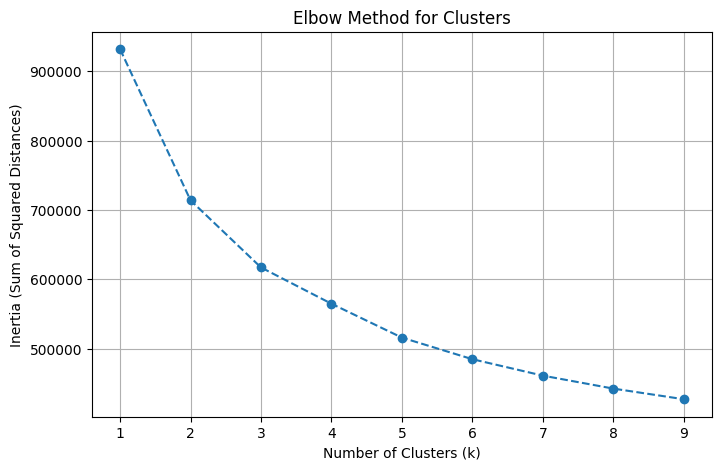

In [13]:

inertia = []
range_clusters = range(1, 10)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_normalized)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()


In [14]:
optimal_clusters = 3  # Update based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=20)
kmeans.fit(df_normalized)

# Assign cluster labels to the dataset
df_cleaned['Cluster'] = kmeans.labels_
centers = kmeans.cluster_centers_

print("\nCluster Centers (normalized):")
print(centers)




Cluster Centers (normalized):
[[ 0.66012056  0.94256914 -0.22532955  0.74922434  0.72206709  0.06492609
   0.06526264  0.10111224 -0.67695619 -0.59724285 -0.34388915 -0.44249814
  -0.47358948 -0.49455827  0.84455425  0.94687184]
 [ 0.16127519 -0.38523304  0.51985158 -0.23741063 -0.89719443  0.62569656
   0.45381034  0.45731988  0.4876227   0.77643676 -0.64468313 -0.51294558
   0.77978302  0.79197601 -0.11054568 -0.44585857]
 [-0.85453176 -0.72776516 -0.16821929 -0.63352181 -0.07586035 -0.57190273
  -0.43476706 -0.47697563  0.35392981  0.03527424  0.89368989  0.89668008
  -0.10330568 -0.09001379 -0.83978493 -0.68399489]]


/Users/aashvibudia/Desktop/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


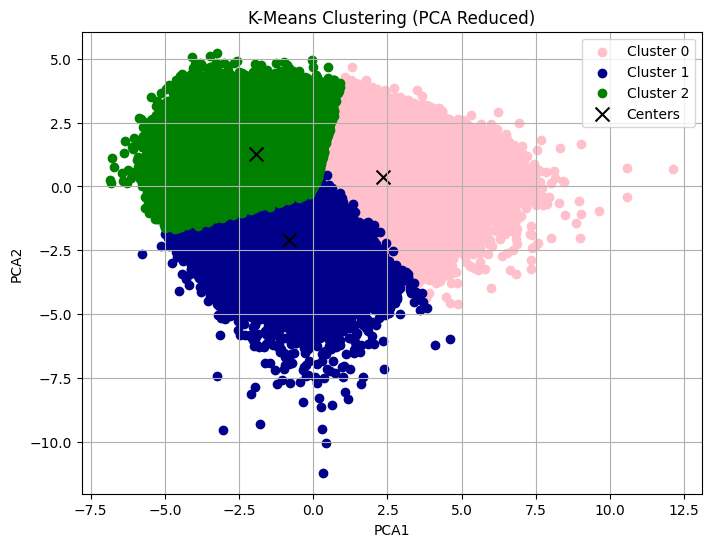

In [18]:
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_normalized), columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = kmeans.labels_



colors = ['pink', 'darkblue', 'green']


plt.figure(figsize=(8, 6))
for cluster in range(optimal_clusters):
    cluster_points = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(
        cluster_points['PCA1'], cluster_points['PCA2'], 
        color=colors[cluster % len(colors)], 
        label=f'Cluster {cluster}'
    )


plt.scatter(centers_pca[:, 0], centers_pca[:, 1], color='black', marker='x', s=100, label='Centers')

plt.title('K-Means Clustering (PCA Reduced)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid(True)
plt.show()




In [16]:
print("\nExplanation of Results:")
print("1. Each cluster represents groups of days with similar weather patterns.")
print("2. Dimensionality reduction via PCA helps visualize clusters in 2D.")
print("3. The original features contributed to the clustering process.")



Explanation of Results:
1. Each cluster represents groups of days with similar weather patterns.
2. Dimensionality reduction via PCA helps visualize clusters in 2D.
3. The original features contributed to the clustering process.
